In [8]:
%matplotlib inline

In [7]:
from sklearn.decomposition import PCA
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import PIL
from datetime import datetime

In [10]:
cand = pd.read_csv('data/candidatos.csv')
votos = pd.read_csv('data/votos.csv')

In [11]:
votos['date'] = votos['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
votos['ano'] = votos['date'].apply(lambda x:x.year)

In [12]:
df = pd.merge(cand[['ano', 'candidato_id', 'partido']],
                votos, on=['candidato_id', 'ano'], how='inner')

In [13]:
def pca_over_year(year):
    v = pd.pivot_table(df[df['ano'] == year],
                       values='voto',index=['candidato_id', 'partido'],
                       columns='sessao_id', fill_value=0)
    part = v.reset_index().drop('candidato_id', axis=1)
    part = part.groupby('partido').mean()
    x, y = PCA(2).fit_transform(part).T
    return part.index.tolist(), x, y

In [14]:
def cvtcolor(path):
    PIL.Image.open(path).convert("RGBA").save(path)

In [15]:
def getImage(partido):
    p = partido.upper().replace(' ', '')
    path = glob.glob(f"../logos/{p}.*")[0]
    img = PIL.Image.open(path)
    img.thumbnail((50, 50))
    return OffsetImage(img)

def spectre(year):
    fig, ax = plt.subplots(figsize=(20, 6))
    part, x, y, = pca_over_year(year)
    sns.scatterplot(-x, y, hue=part)
    for x0, y0, path in zip(-x, y, part):
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)

PCDOB PDT PFL PL PMDB PPB PPS PRONA PSB PSD PSDB PSTU PT PTB PV S.PART. PCDOB PDT PFL PL PMDB PPB PPS PRONA PSB PSD PSDB PSTU PT PTB PV S.PART. PCDOB PDT PFL PL PMDB PPB PPS PRONA PSB PSD PSDB PSTU PT PTB PV S.PART. PCDOB PDT PFL PL PMDB PPB PPS PRONA PSB PSD PSDB PSTU PT PTB PV S.PART. PCDOB PDT PFL PHS PL PMDB PPB PPS PSB PSC PSDB PSL PST PT PTB PTN PV S.PART. PCDOB PDT PFL PHS PL PMDB PPB PPS PSB PSDB PSL PST PT PTB PTN PV S.PART. PCDOB PDT PFL PHS PL PMDB PPB PPS PSB PSDB PSL PST PT PTB PTN PV S.PART. PCDOB PDT PFL PL PMDB PP PPS PR PSB PSC PSDB PSOL PT PTB PTC PV S.PART. PCDOB PDT PFL PL PMDB PP PPS PR PSB PSC PSDB PSOL PT PTB PTC PV S.PART. PCDOB PDT PFL PMDB PP PPS PR PSB PSC PSDB PSOL PT PTB PTC PV S.PART. DEM PCDOB PDT PHS PMDB PMN PP PPS PR PRB PRTB PSB PSC PSDB PSOL PT PTB PTC PTDOB PV DEM PCDOB PDT PHS PMDB PMN PP PPS PR PRB PRTB PSB PSC PSDB PSOL PT PTB PTC PTDOB PV DEM PCDOB PDT PHS PMDB PMN PP PPS PR PRB PSB PSC PSDB PSOL PT PTB PTC PTDOB PV DEM PCDOB PDT PMDB PMN PP PPS

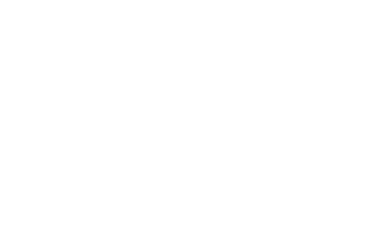

In [34]:
fig, ax = plt.subplots()
ax.set_xlim((-2, 2))
ax.set_ylim((-6, 4))
scat = ax.scatter([], [])
anos = df['ano'].value_counts().sort_index().index.tolist()
images = {}
for x0, y0, path in zip(x, y, part):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)

def init():
    return (scat, ax)

def animate(i):
    part, x, y, = pca_over_year(anos[i])
    data = np.array([x, y]).T
    scat.set_offsets(data)
    annotation.xytext
    return (scat,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=16, interval=2000, blit=True)

HTML(anim.to_html5_video())

